# Task 1

### Lattice Constant for Si

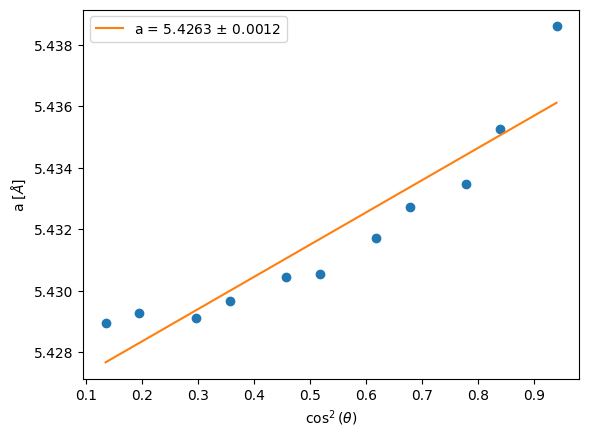

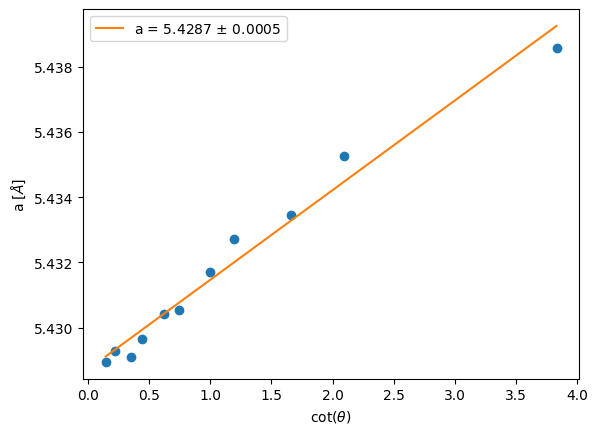

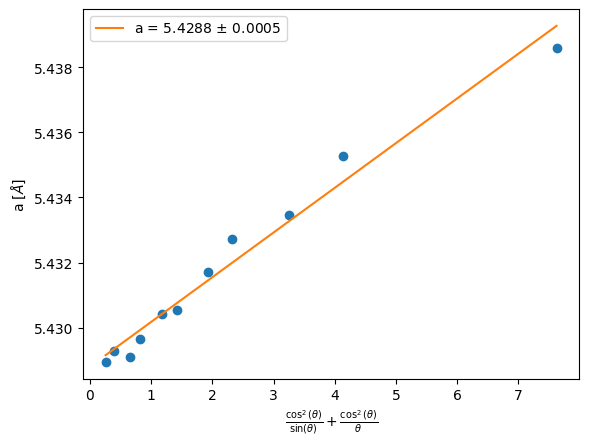

In [67]:
# finding lattice parameters from miller indices and interplanar spacing given in xlsx file

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# read the xlsx file
df = pd.read_excel('Task 1\Si.xlsx')

# read the data from the xlsx file
h = df['h'].values
k = df['k'].values
l = df['l'].values
theta = np.radians(df['2Theta[deg]'].values / 2)
lda = 1.54056 # wavelength of the x-ray beam in Angstrom

# calculate the lattice parameters
a =  lda*np.sqrt(h**2+k**2+l**2)/(2*np.sin(theta)) 

# define three error functions 
def error1(theta):
    return np.cos(theta)**2
def error2(theta):
    return np.cos(theta)/np.tan(theta)
def error3(theta):
    return (np.cos(theta)**2/(np.sin(theta)) + (np.cos(theta))**2/theta)

#add linear fit to plot

plt.plot(error1(theta), a, 'o')
m, c = np.polyfit(error1(theta), a, 1)
c_uncertainty = np.sqrt(np.sum((a - (m*error1(theta) + c))**2)/(len(a)-2))
plt.xlabel(r'$\cos^2(\theta)$')
plt.ylabel(r'a [$\AA$]')
plt.plot(error1(theta), m*error1(theta) + c, label='a = {:.4f} '.format(c) + r'$\pm$ {:.4f}'.format(c_uncertainty))
plt.legend()
plt.savefig('Figures\SiCos.png', dpi = 500)
plt.show()


plt.plot(error2(theta), a, 'o')
m, c = np.polyfit(error2(theta), a, 1)
c_uncertainty = np.sqrt(np.sum((a - (m*error2(theta) + c))**2)/(len(a)-2))
plt.xlabel(r'$\cot(\theta)$')
plt.ylabel(r'a [$\AA$]')
plt.plot(error2(theta), m*error2(theta) + c, label='a = {:.4f} '.format(c) + r'$\pm$ {:.4f}'.format(c_uncertainty))
plt.legend()
plt.savefig('Figures\SiCot.png', dpi = 500)
plt.show()


plt.plot(error3(theta), a, 'o')
m, c = np.polyfit(error3(theta), a, 1)
c_uncertainty = np.sqrt(np.sum((a - (m*error3(theta) + c))**2)/(len(a)-2))
plt.xlabel(r'$\frac{\cos^2(\theta)}{\sin(\theta)} + \frac{\cos^2(\theta)}{\theta}$')
plt.ylabel(r'a [$\AA$]')
plt.plot(error3(theta), m*error3(theta) + c, label='a = {:.4f} '.format(c) + r'$\pm$ {:.4f}'.format(c_uncertainty))
plt.legend()
plt.savefig('Figures\SiNelson.png', dpi = 500)
plt.show()



### Lattice Constants for ZnO

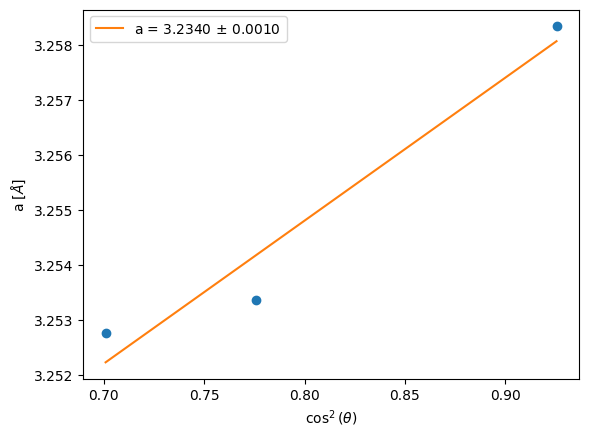

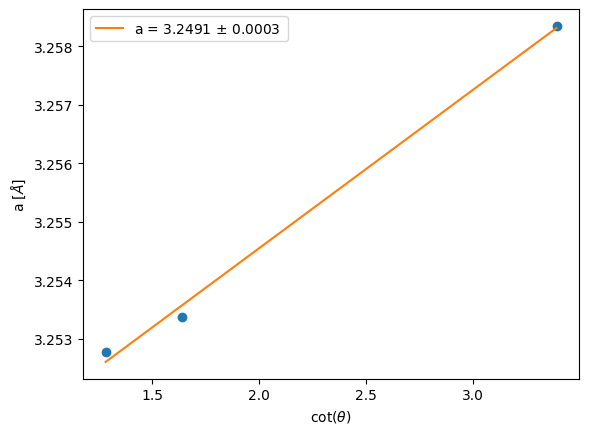

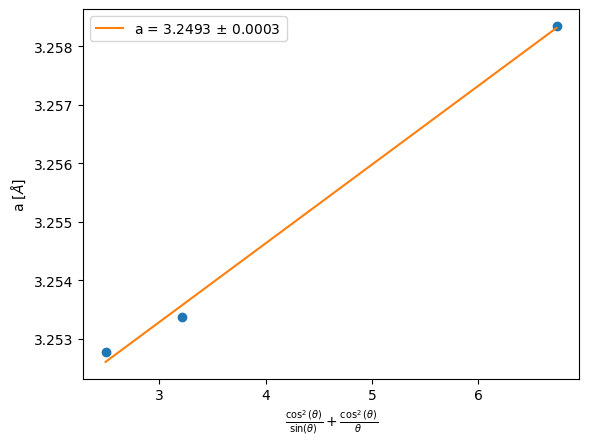

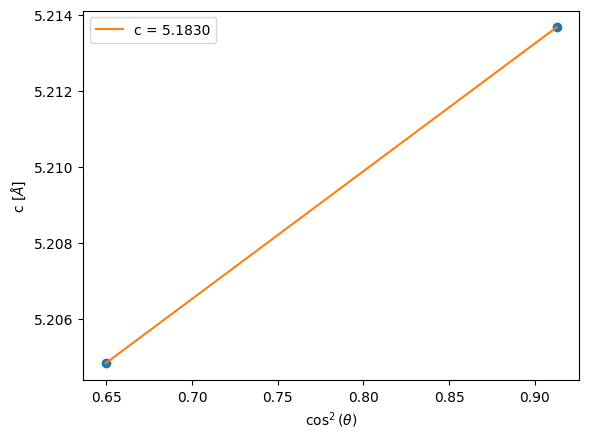

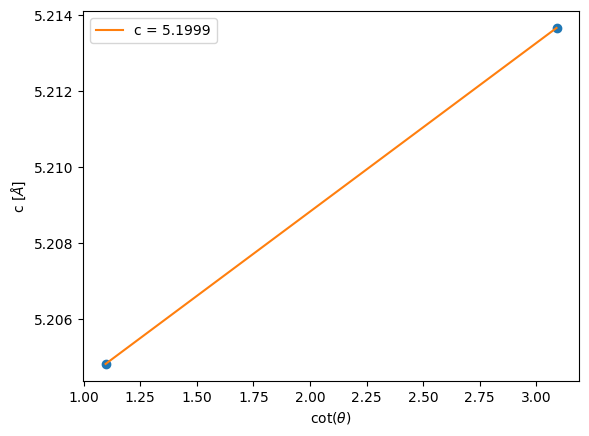

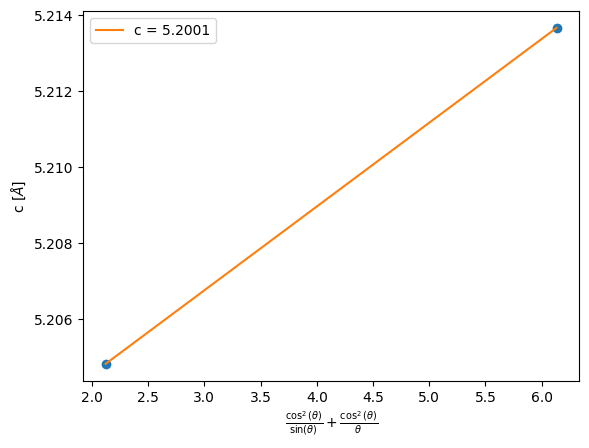

In [68]:
# finding lattice parameters from miller indices and interplanar spacing given in xlsx file

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# read the xlsx file
df = pd.read_excel('Task 1\ZnO.xlsx')

# read the data from the xlsx file
h = df['h'].values
k = df['k'].values
l = df['l'].values
theta = df['2Theta[deg]'].values / 2
theta = np.radians(theta)
lda = 1.54056 # wavelength of the x-ray beam in Angstrom

a = [value for value in (lda*np.sqrt(h[i]**2 + k[i]**2 + h[i]*k[i]) / (np.sqrt(3) * np.sin(theta[i])) if l[i] == 0 else None for i in range(len(l))) if value is not None]
atheta = [value for value in (theta[i] if l[i] == 0 else None for i in range(len(l))) if value is not None]

# define three error functions 
def error1(theta):
    return np.cos(theta)**2
def error2(theta):
    return np.cos(theta)/np.tan(theta)
def error3(theta):
    return (np.cos(theta)**2/(np.sin(theta)) + (np.cos(theta))**2/theta)

#add linear fit to plot

plt.plot(error1(atheta), a, 'o')
m, c = np.polyfit(error1(atheta), a, 1)
c_uncertainty = np.sqrt(np.sum((a - (m*error1(atheta) + c))**2)/(len(a)-2))
plt.xlabel(r'$\cos^2(\theta)$')
plt.ylabel(r'a [$\AA$]')
plt.plot(error1(atheta), m*error1(atheta) + c, label='a = {:.4f} '.format(float(c)) + r'$\pm$ {:.4f}'.format(float(c_uncertainty)))
plt.legend()
plt.savefig('Figures\ZnOCosA.png', dpi = 500)
plt.show()


plt.plot(error2(atheta), a, 'o')
m, c = np.polyfit(error2(atheta), a, 1)
c_uncertainty = np.sqrt(np.sum((a - (m*error2(atheta) + c))**2)/(len(a)-2))
plt.xlabel(r'$\cot(\theta)$')
plt.ylabel(r'a [$\AA$]')
plt.plot(error2(atheta), m*error2(atheta) + c, label='a = {:.4f} '.format(c) + r'$\pm$ {:.4f} '.format(c_uncertainty))
plt.legend()
plt.savefig('Figures\ZnOCotA.png', dpi = 500)
plt.show()



plt.plot(error3(atheta), a, 'o')
m, c = np.polyfit(error3(atheta), a, 1)
c_uncertainty = np.sqrt(np.sum((a - (m*error3(atheta) + c))**2)/(len(a)-2))
plt.xlabel(r'$\frac{\cos^2(\theta)}{\sin(\theta)} + \frac{\cos^2(\theta)}{\theta}$')
plt.ylabel(r'a [$\AA$]')
plt.plot(error3(atheta), m*error3(atheta) + c, label='a = {:.4f} '.format(c) + r'$\pm$ {:.4f}'.format(c_uncertainty))
plt.legend()
plt.savefig('Figures\ZnONelsonA.png', dpi = 500)
plt.show()


c = [value for value in (lda*l[i]/(2 * np.sin(theta[i]))  if h[i] == 0 & k[i]==0 else None for i in range(len(l))) if value is not None]
ctheta = [value for value in (theta[i] if h[i] == 0 & k[i]==0 else None for i in range(len(l))) if value is not None]

plt.plot(error1(ctheta), c, 'o')
m, b = np.polyfit(error1(ctheta), c, 1)
plt.xlabel(r'$\cos^2(\theta)$')
plt.ylabel(r'c [$\AA$]')
plt.plot(error1(ctheta), m*error1(ctheta) + b, label='c = {:.4f}'.format(b))
plt.legend()
plt.savefig('Figures\ZnOCosC.png', dpi = 500)
plt.show()


plt.plot(error2(ctheta), c, 'o')
m, b = np.polyfit(error2(ctheta), c, 1)
plt.xlabel(r'$\cot(\theta)$')
plt.ylabel(r'c [$\AA$]')
plt.plot(error2(ctheta), m*error2(ctheta) + b, label='c = {:.4f}'.format(b) )
plt.legend()
plt.savefig('Figures\ZnOCotC.png', dpi = 500)
plt.show()


plt.plot(error3(ctheta), c, 'o')
m, b = np.polyfit(error3(ctheta), c, 1)
plt.xlabel(r'$\frac{\cos^2(\theta)}{\sin(\theta)} + \frac{\cos^2(\theta)}{\theta}$')
plt.ylabel(r'c [$\AA$]')
plt.plot(error3(ctheta), m*error3(ctheta) + b, label='c = {:.4f}'.format(b))
plt.legend()
plt.savefig('Figures\ZnONelsonC.png', dpi = 500)
plt.show()









## Peaks for Si

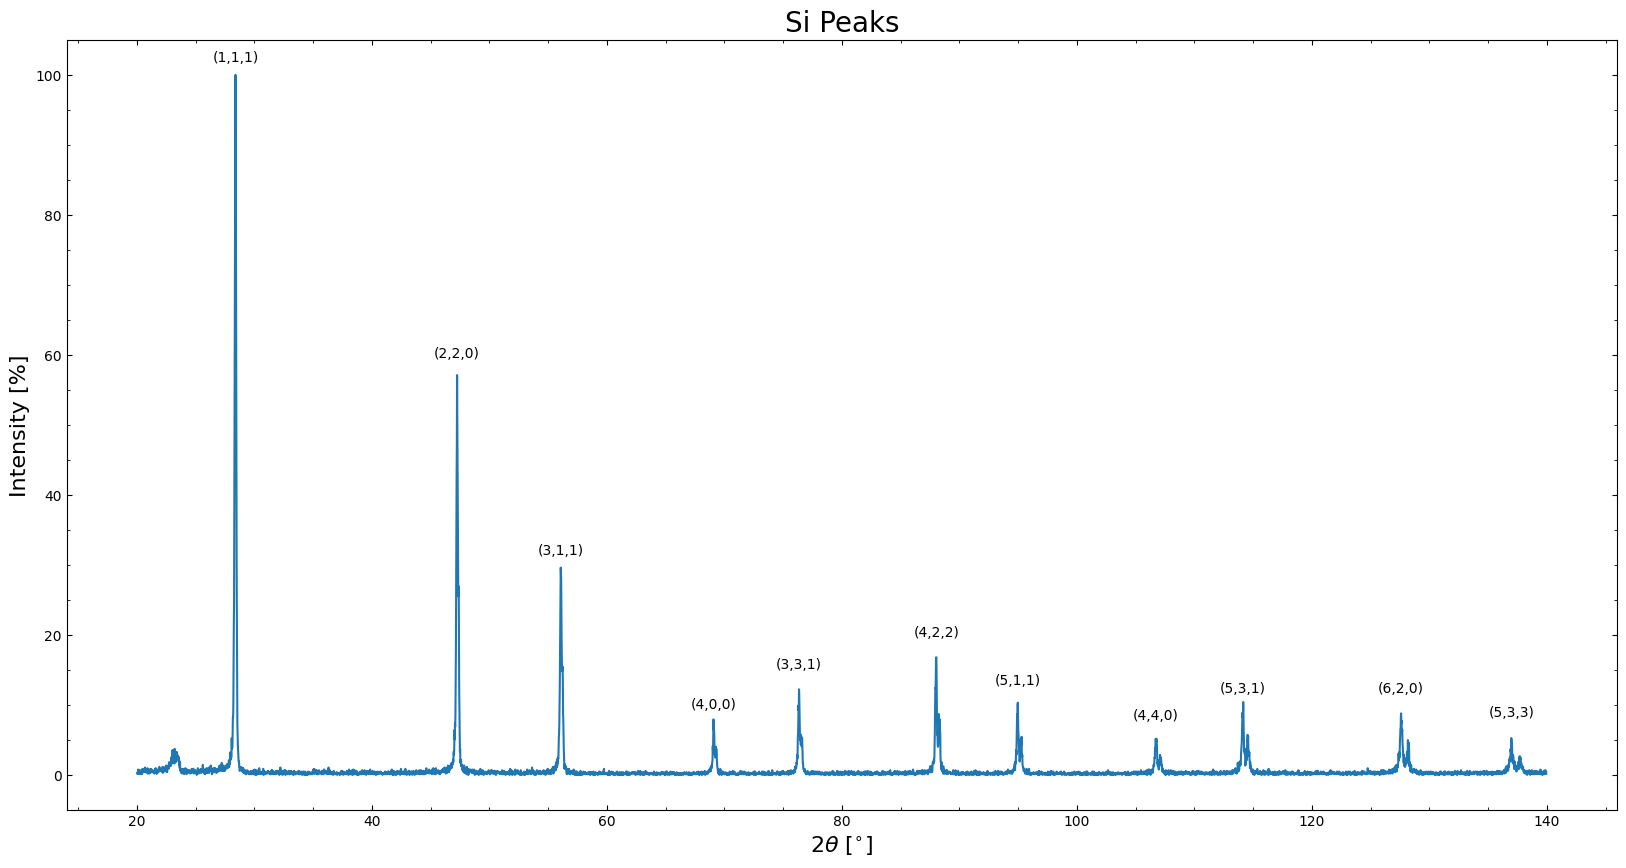

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file for intensity data
df = pd.read_csv('Task 1/Si.csv')

# Convert angles to radians and divide by 2 for theta
theta_csv = df['Angle'].values 
intensity = df[' Intensity'].values

# Normalize intensity to percentage
intensity_percentage = (intensity / intensity.max()) * 100

# Read the Excel file for peak indices and theta values
peaks = pd.read_excel('Task 1/Si.xlsx')

# Extract hkl values and theta from the Excel file
h = peaks['h'].values
k = peaks['k'].values
l = peaks['l'].values
theta_xlsx = peaks['2Theta[deg]'].values 

# Plot the XRD pattern
plt.figure(figsize=(20, 10))
plt.plot(theta_csv, intensity_percentage)
plt.xlabel(r'$2\theta$ [$^{\circ}$]', fontsize = 16)
plt.ylabel('Intensity [%]', fontsize = 16)
plt.title('Si Peaks', fontsize = 20)
plt.tick_params(top=True, right=True, which='both', direction='in')
plt.minorticks_on()

for i in range(len(h)):
    # Find the index of the closest theta value in the CSV data
    close_indices = np.where(np.isclose(np.radians(theta_csv/2), np.radians(theta_xlsx[i]/2), atol=1e-4))[0]
    if close_indices.size > 0:
        matching_intensity = intensity_percentage[close_indices[0]]
        # Calculate dynamic offset based on peak height
        offset = 1.5 + 0.012 * (100-matching_intensity)
        plt.text(theta_xlsx[i], matching_intensity + offset, f'({h[i]},{k[i]},{l[i]})', ha='center', va='bottom')
    else:
        print(f"No matching theta found for index {i} with hkl ({h[i]},{k[i]},{l[i]})")

# Save and show the figure

plt.savefig('Figures/SiPeaks.png', dpi=500)
plt.show()




## Peaks for ZnO

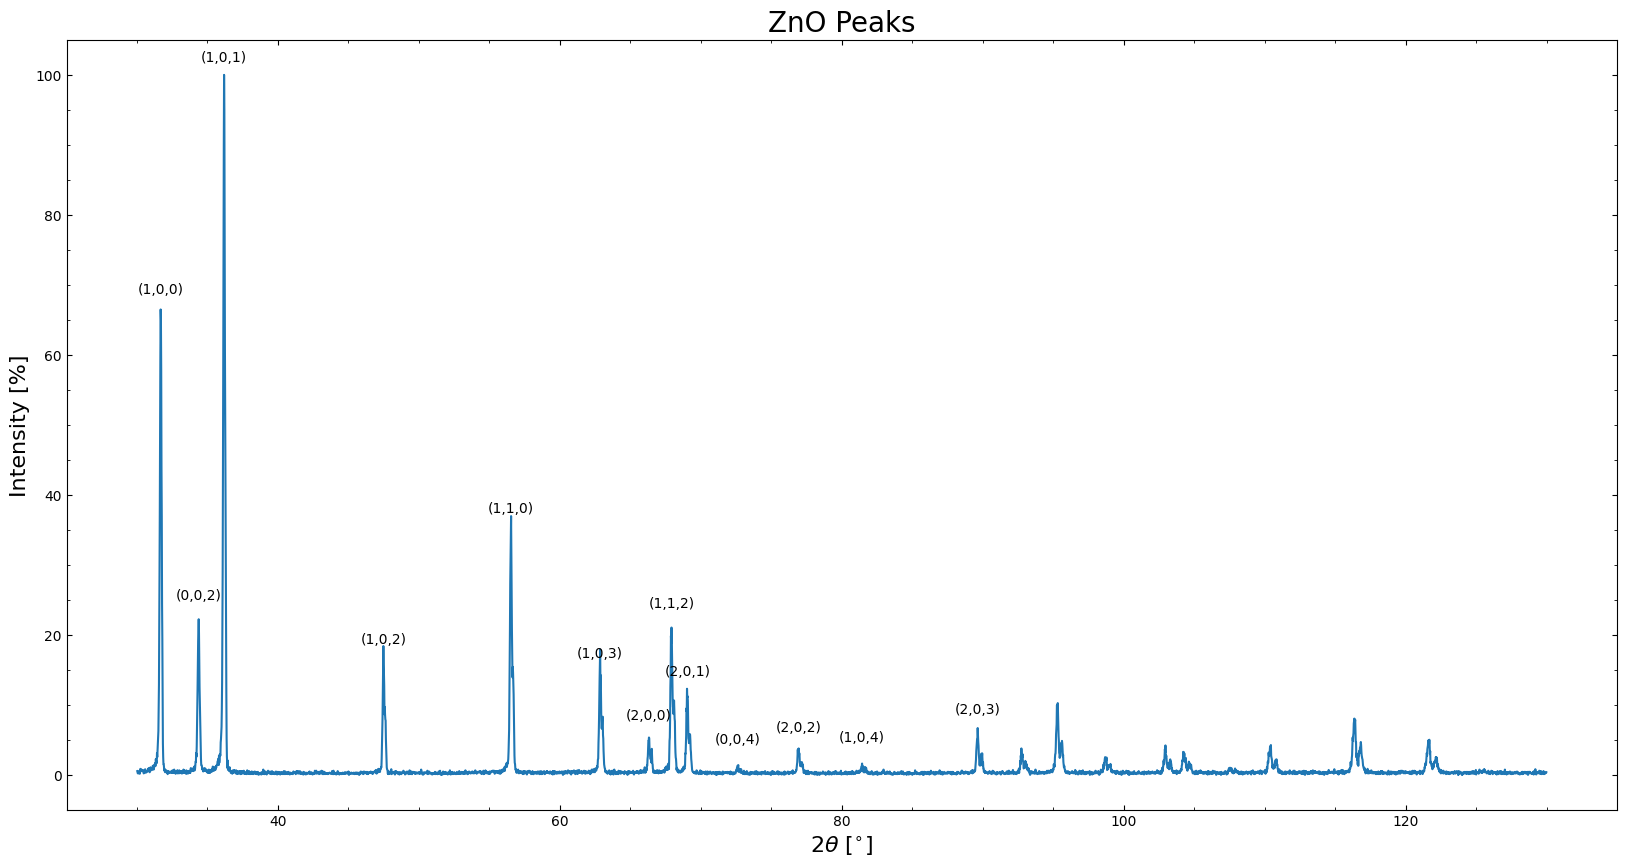

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file for intensity data
df = pd.read_csv('Task 1/ZnO.csv')

# Convert angles to radians and divide by 2 for theta
theta_csv = df['Angle'].values 
intensity = df[' Intensity'].values

# Normalize intensity to percentage
intensity_percentage = (intensity / intensity.max()) * 100

# Read the Excel file for peak indices and theta values
peaks = pd.read_excel('Task 1/ZnO.xlsx')

# Extract hkl values and theta from the Excel file
h = peaks['h'].values
k = peaks['k'].values
l = peaks['l'].values
theta_xlsx = peaks['2Theta[deg]'].values 

# Plot the XRD pattern
plt.figure(figsize=(20, 10))
plt.plot(theta_csv, intensity_percentage)
plt.xlabel(r'$2\theta$ [$^{\circ}$]', fontsize = 16)
plt.ylabel('Intensity [%]', fontsize = 16)
plt.title('ZnO Peaks', fontsize = 20)
plt.tick_params(top=True, right=True, which='both', direction='in')
plt.minorticks_on()
plt.yrange = [-5, 115]

for i in range(len(h)):
    # Find the index of the closest theta value in the CSV data
    close_indices = np.where(np.isclose(np.radians(theta_csv/2), np.radians(theta_xlsx[i]/2), atol=1e-4))[0]
    if close_indices.size > 0:
        matching_intensity = intensity_percentage[close_indices[0]]
        # Calculate dynamic offset based on peak height
        offset = 1.5 + 0.012 * (100-matching_intensity)
        plt.text(theta_xlsx[i], matching_intensity + offset, f'({h[i]},{k[i]},{l[i]})', ha='center', va='bottom')
    else:
        print(f"No matching theta found for index {i} with hkl ({h[i]},{k[i]},{l[i]})")

# Save and show the figure

plt.savefig('Figures/ZnOPeaks.png', dpi=500)
plt.show()

# Task 3

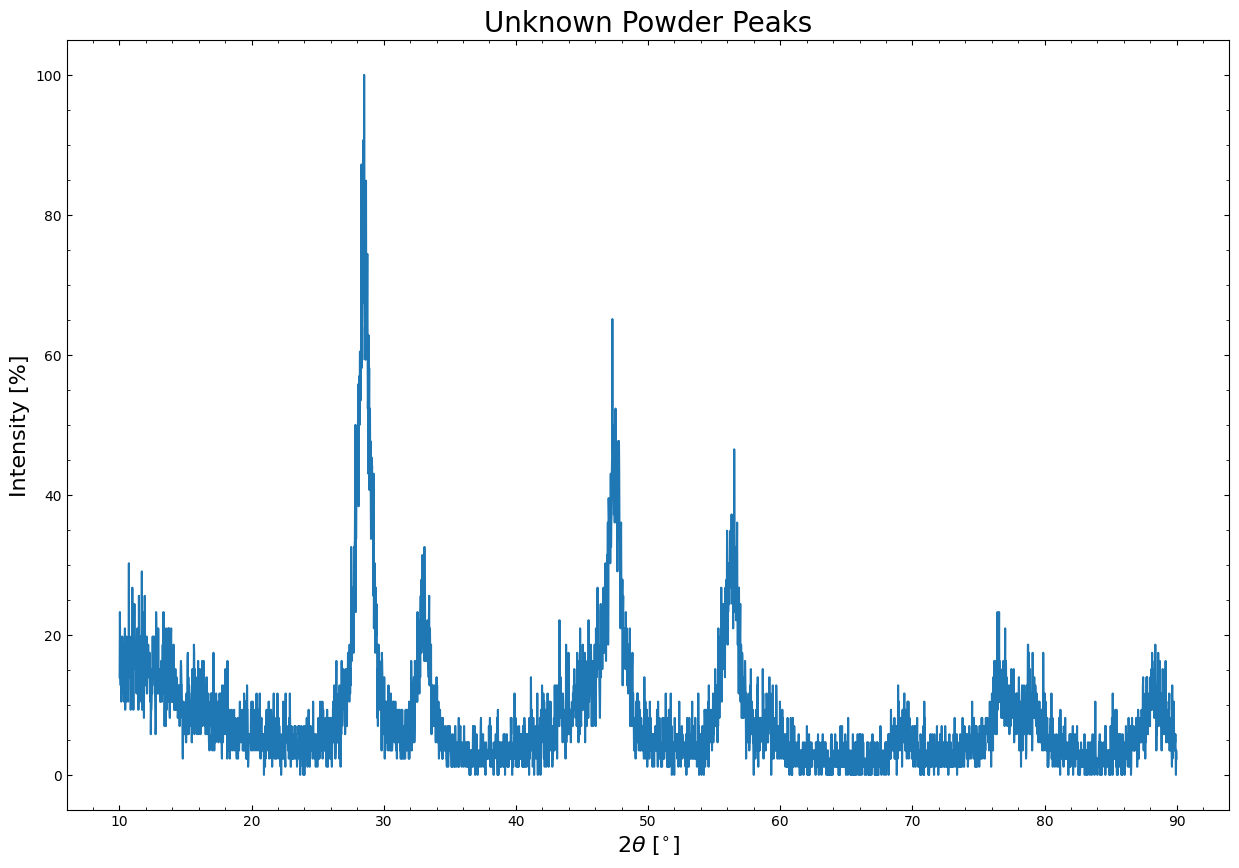

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file for intensity data
df = pd.read_csv('Task 3/UnknownPowder.csv')

# Convert angles to radians and divide by 2 for theta
theta_csv = df['Angle'].values 
intensity = df[' Intensity'].values

# Normalize intensity to percentage
intensity_percentage = (intensity / intensity.max()) * 100


# Plot the XRD pattern
plt.figure(figsize=(15, 10))
plt.plot(theta_csv, intensity_percentage)
plt.xlabel(r'$2\theta$ [$^{\circ}$]', fontsize = 16)
plt.ylabel('Intensity [%]', fontsize = 16)
plt.title('Unknown Powder Peaks', fontsize = 20)
plt.tick_params(top=True, right=True, which='both', direction='in')
plt.minorticks_on()
plt.yrange = [-5, 115]

# Save and show the figure

plt.savefig('Latex/Figures/UnknownPowderPeaks.png', dpi=500)
plt.show()